# Fine tuning with S-BERT

The models will be saved in this folder - https://drive.google.com/drive/folders/1ui5rywdrDdbBUeHph9AaA0VpfX01bbRe?usp=sharing


# Setup

In [ ]:
# Install necessary libraries
! pip install --quiet \
  scprep\
  spacy==3.0.5 \
  sentence_transformers==1.0.2 \
  phate==1.0.7 && \
  python -m spacy download es_core_news_lg

# Setup connection with your own google drive
from google.colab import drive
drive.mount('/content/drive')

# Restarting the runtime is required for the libraries to be active in the notebook
import os
os.kill(os.getpid(), 9)

In [2]:
# Clone branch from github
!rm -rf policy-data-analyzer/
! branch_name='refactoring_fine_tuning' && \
  git clone --branch $branch_name https://github.com/wri-dssg/policy-data-analyzer.git

Cloning into 'policy-data-analyzer'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 5474 (delta 104), reused 127 (delta 45), pack-reused 5263
Receiving objects: 100% (5474/5474), 203.81 MiB | 32.00 MiB/s, done.
Resolving deltas: 100% (2869/2869), done.
Checking out files: 100% (1143/1143), done.


In [3]:
#If you run this cell more than once, comment out this line because you are already in this folder and you will get an error
import os
os.chdir("policy-data-analyzer") 

from tasks.fine_tuning_sbert.src.loops import *

Using the GPU


# Data Loading

In [4]:
"""
MAKE SURE THAT THIS IS ALWAYS YOUR INDIVIDUAL NUMBER (FOR REASONS TO NOT OVERWRITE DATA)
"""

GLOBAL_EXPERIMENT_NUMBER = 6

In [6]:
experiment = "EXP30"
classifier = "Binary"

base_path = "/content/drive/MyDrive/WRI-LatinAmerica-Talent"

data_path = f"{base_path}/Cristina_Policy_Files/Tagged_sentence_lists/Spanish/datasets/{classifier}"

results_save_path = f"{base_path}/Modeling/Model_reproducibility/Model_results/\
                                {classifier}ClassificationExperiments/{GLOBAL_EXPERIMENT_NUMBER}/"

if not os.path.exists(results_save_path):
    os.makedirs(results_save_path)
    print(f"Making new experiment folder for experiment # {GLOBAL_EXPERIMENT_NUMBER}")
else:
    print("Please do not overwrite existing models and their results from previous experiments")
    print(f"You are writing to Experiment # {GLOBAL_EXPERIMENT_NUMBER}")

train_sents, train_labels, test_sents, test_labels = load_dataset(data_path, experiment)
label_names = unique_labels(train_labels)
numeric_train_labels = labels2numeric(train_labels, label_names)

# plot_data_distribution(numeric_train_labels, label_names)
# print("Train Sentence:", train_sents[2], "\nTrain Label:", train_labels[2])
# print("Test Sentence:", test_sents[2], "\nTest Label:", test_labels[2])

Please do not overwrite existing models and their results from previous experiments
You are writing to Experiment # 6


# Grid Search Fine Tuning

Stores only the parameters used in the grid search, together with the results - no model is stored

Grid Search Fine tuning parameters:
{
    "all_test_perc": [
        0.2
    ],
    "model_names": [
        "paraphrase-xlm-r-multilingual-v1"
    ],
    "output_path": "/content/drive/MyDrive/WRI-LatinAmerica-Talent/Modeling/Model_reproducibility/Model_results/                                BinaryClassificationExperiments/6/",
    "experiment": 6,
    "max_num_epochs": 10,
    "baseline": 0.001,
    "patience": 5,
    "seeds": [
        12
    ],
    "eval_classifier": "SBERT"
}



Current Score is: 0.8209876543209876
Current ACC_LIST is: [1e-06, 0.8209876543209876]
Epoch: 0
Best score: 0.8209876543209876



Current Score is: 0.9382716049382716
Current ACC_LIST is: [0.8209876543209876, 0.9382716049382716]
Epoch: 1
Best score: 0.9382716049382716



Current Score is: 0.9444444444444444
Current ACC_LIST is: [0.8209876543209876, 0.9382716049382716, 0.9444444444444444]
Epoch: 2
Best score: 0.9444444444444444



Current Score is: 0.9444444444444444
Current ACC_LIST is: [0.8209876543209876, 0.9382716049382716, 0.9444444444444444, 0.9444444444444444]
TRAINING EXITED. Best model has been found.
Epoch: 3
Best score: 0.9444444444444444


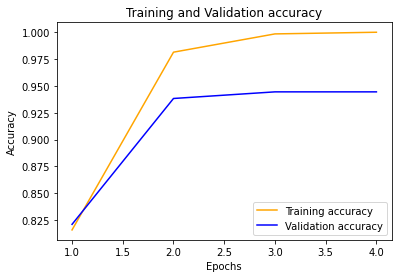

Time taken for fine-tuning: 00:02:09.67
Classifying sentences...


100%|██████████| 203/203 [00:04<00:00, 42.84it/s]


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 203 samples in 0.001s...
[t-SNE] Computed neighbors for 203 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 203 / 203
[t-SNE] Mean sigma: 11.205881
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.897022
[t-SNE] KL divergence after 750 iterations: 0.422733


100%|██████████| 203/203 [00:00<00:00, 2810.60it/s]


Evaluating predictions...
Stored confusion matrix: /content/drive/MyDrive/WRI-LatinAmerica-Talent/Modeling/Model_reproducibility/Model_results/                                BinaryClassificationExperiments/6//SBERT_model=paraphrase-xlm-r-multilingual-v1_test-perc=0.2_n-epoch=10_seed=12_cm.png


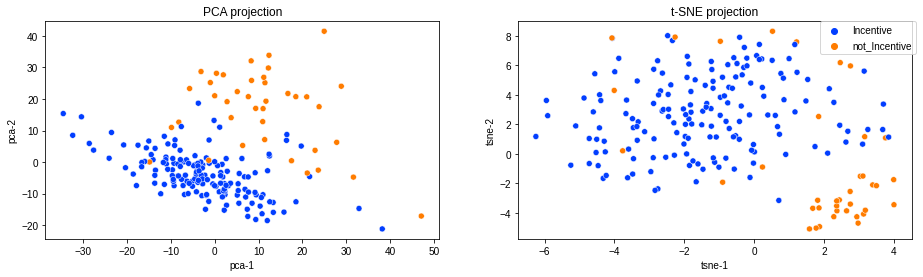

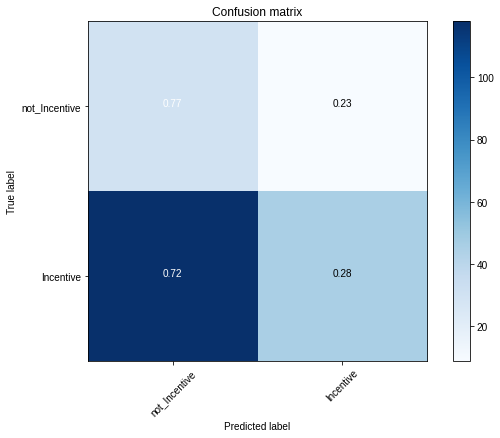

Macro/Weighted Avg F1-score: [0.37047346958708766, 0.4010263357286059]


In [7]:
grid_search_params = {
    "all_test_perc": [0.2],# 0.15, 0.25, 0.3],
    "model_names": ['paraphrase-xlm-r-multilingual-v1'], #'stsb-xlm-r-multilingual', 'quora-distilbert-multilingual''distiluse-base-multilingual-sed-v2',
    "output_path": results_save_path,
    "experiment": GLOBAL_EXPERIMENT_NUMBER,
    "max_num_epochs": 10,
    "baseline": 0.001,
    "patience": 5,
    "seeds": [12]
}

grid_search_fine_tune_sbert(grid_search_params, train_sents, train_labels, test_sents, test_labels, label_names)

## Loading saved model

In [8]:
saved_model = EarlyStoppingSentenceTransformer(model_name_or_path=results_save_path)
str(saved_model)

'EarlyStoppingSentenceTransformer(\n  (0): Transformer(\n    (auto_model): XLMRobertaModel(\n      (embeddings): RobertaEmbeddings(\n        (word_embeddings): Embedding(250002, 768, padding_idx=1)\n        (position_embeddings): Embedding(514, 768, padding_idx=1)\n        (token_type_embeddings): Embedding(1, 768)\n        (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)\n        (dropout): Dropout(p=0.1, inplace=False)\n      )\n      (encoder): RobertaEncoder(\n        (layer): ModuleList(\n          (0): RobertaLayer(\n            (attention): RobertaAttention(\n              (self): RobertaSelfAttention(\n                (query): Linear(in_features=768, out_features=768, bias=True)\n                (key): Linear(in_features=768, out_features=768, bias=True)\n                (value): Linear(in_features=768, out_features=768, bias=True)\n                (dropout): Dropout(p=0.1, inplace=False)\n              )\n              (output): RobertaSelfOutput(\n          

## Define evaluation classifier (optional)
If using a sklearn or other non-SBERT model as a classifier for evaluation, uncomment one of these models (or add your own and name it `clf`)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = LGBMClassifier(n_estimators=2000,
                      feature_fraction=0.06,
                      bagging_fraction=0.67,
                      bagging_freq=1,
                      verbose=0,
                      n_jobs=6,
                      random_state=69420)

clf = svm.SVC(gamma=0.001, C=100.)

clf = RandomForestClassifier(n_estimators=500,
                            max_features=0.06,
                            n_jobs=6,
                            random_state=69420)